In [2]:
# General Imports
import numpy as np

# Visualisation Imports
import matplotlib.pyplot as plt

# Scikit Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import pandas as pd

In [3]:
df = pd.read_csv("city_hour.csv")
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [4]:
# Find null
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [5]:
df = df.dropna(how = 'any', axis = 0)
df.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [6]:
df.shape

(129277, 16)

In [7]:
df.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [9]:
df["AQI_Bucket"].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Satisfactory', 'Good', 'Severe'],
      dtype=object)

In [12]:
from sklearn import preprocessing

le  = preprocessing.LabelEncoder()
df["AQI_Bucket"] = le.fit_transform(df["AQI_Bucket"])
df["AQI_Bucket"].unique()

array([1, 2, 5, 3, 0, 4])

In [14]:
df.drop(columns = ["City", "Datetime"], inplace = True)

In [15]:
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
50888,104.00,148.50,1.93,23.00,13.75,9.80,0.1,15.30,117.62,0.30,10.40,0.23,155.0,1
50889,94.50,142.00,1.33,16.25,9.75,9.65,0.1,17.00,136.23,0.28,7.10,0.15,159.0,1
50890,82.75,126.50,1.47,14.83,9.07,9.70,0.1,15.40,149.92,0.20,4.55,0.08,173.0,1
50893,68.50,117.00,1.35,13.60,8.35,7.40,0.1,21.80,161.70,0.10,2.30,0.00,191.0,1
50894,69.25,112.25,1.52,11.80,7.55,9.25,0.1,21.38,161.68,0.10,2.35,0.00,191.0,1


In [16]:
len(df.columns)

14

In [17]:
X = df.drop(["AQI_Bucket"], axis = "columns")
X.shape

(129277, 13)

In [18]:
y = df["AQI_Bucket"]

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 13)
pca.fit(X)

PCA(n_components=13)

In [21]:
print("Variance explained by all 187 principal components = ", sum(pca.explained_variance_ratio_ * 100))

Variance explained by all 187 principal components =  100.0


Text(0, 0.5, 'Explained variance')

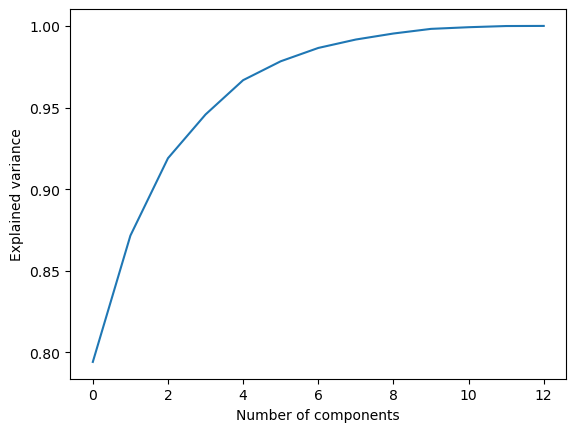

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')


In [32]:
pca_4 = PCA(n_components = 2)
pca_4.fit(X)

PCA(n_components=2)

In [33]:
print("Variance explained by all 187 principal components = ", sum(pca_4.explained_variance_ratio_ * 100))

Variance explained by all 187 principal components =  87.15712968277691


In [25]:
from dwave.plugins.sklearn import SelectFromQuadraticModel

# Classical Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Machine Learning Utilities
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import numpy as np
import openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import plotly.express as px
from plotly.subplots import make_subplots
import dimod
from dwave.system import LeapHybridCQMSampler

In [34]:
# Feature selection the easy way
X_new = SelectFromQuadraticModel(num_features = 2, alpha = 0.5).fit_transform(X,y)

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names



In [35]:
def show_relevance_redundancy(X, y, indices = None, title = ""):
    if not indices is None:
        X = X.iloc[:,indices].copy()
    y = y
    fig = make_subplots(
        rows = 1,
        cols = 2,
        column_widths = [0.68, 0.32],
        column_titles = ["relevance", "redundancy"],
    )
    
    trace_rel = px.bar(np.array([abs(np.corrcoef(x,y)[0,1]) for x in X.values.T]))
    trace_red = px.imshow(abs(np.corrcoef(X.values, rowvar = False)))
    fig.add_trace(trace_rel.data[0], row = 1, col = 1)
    fig.add_trace(trace_red.data[0], row = 1, col = 2)
    fig.update_layout(width = 1200, height = 480, title = title)
    fig.show()

In [36]:
def evaluate_model(m, X, y, indices = None):
    if not indices is None:
        X_filtered = X.iloc[:, indices]
    else:
        X_filtered = X
    acc = np.mean(cross_val_score(clf, X_filtered, y, cv = 5))
    return acc

In [37]:
clf = RandomForestClassifier()

In [38]:
X_new_df = pd.DataFrame(data=X_new, columns=list(range(X_new.shape[1])))

show_relevance_redundancy(
    X_new_df,
    y,
    None,
    f"plugin optimization: acc={evaluate_model(clf, X_new_df, y, None):.4f}",
)

In [40]:
X_new.shape

(129277, 2)

In [41]:
# Feature selection the easy way
X_new = SelectFromQuadraticModel(num_features = 13, alpha = 0.5).fit_transform(X,y)

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names



In [42]:
X_new_df = pd.DataFrame(data=X_new, columns=list(range(X_new.shape[1])))

show_relevance_redundancy(
    X_new_df,
    y,
    None,
    f"plugin optimization: acc={evaluate_model(clf, X_new_df, y, None):.4f}",
)

In [44]:
# Feature selection the easy way
X_new = SelectFromQuadraticModel(num_features = 13, alpha = 0.5).fit_transform(X,y)

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names



In [45]:
X_new_df = pd.DataFrame(data=X_new, columns=list(range(X_new.shape[1])))

In [46]:
evaluate_model(clf, X_new_df, y, None)

0.9980893773299686

In [53]:
var = []
components = []

num_features = 13
for n in range(1,num_features):
    
    X_new = SelectFromQuadraticModel(num_features = n, alpha = 0.5).fit_transform(X,y)
    X_new_df = pd.DataFrame(data=X_new, columns=list(range(X_new.shape[1])))
    var.append(evaluate_model(clf, X_new_df, y, None))
    components.append(n)

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without feature names

C:\Users\Kshitij Dave\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SelectFromQuadraticModel was fitted without f

In [54]:
components

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [55]:
var

[1.0,
 0.999914910673769,
 0.9992264761732894,
 0.9997215346534652,
 0.9997137992057763,
 0.9994353335600674,
 0.9989557390942633,
 0.9989480039457485,
 0.9997756756071082,
 0.9996364411387958,
 0.9989944175294052,
 0.9990176154955952]

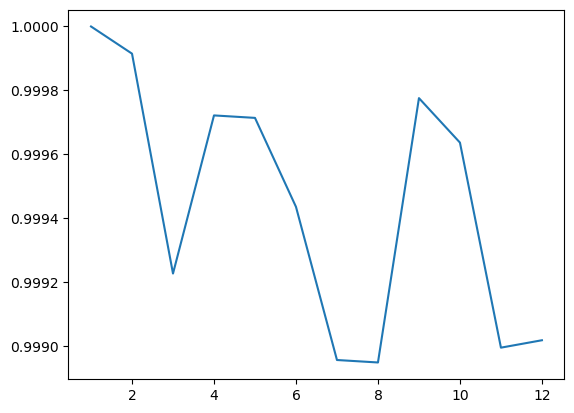

In [56]:
plt.plot(components, var)